In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from tomaster import tomato
from sklearn import datasets
from rmsd import calculate_rmsd

In [2]:
filename = "data/aladip_implicit.xyz" # "data/dihedral.xyz"
coordinates = []
xyz = open(filename)
for line in xyz:
    x,y,z = line.split()
    coordinates.append([float(x), float(y), float(z)])
xyz.close()

In [7]:
coor_array = np.array(coordinates).reshape(-1,10,3)
# 1 block per 10-atom conformation each represented by 3 spatial dimensions

In [8]:
coor_array

array([[[24.949, 24.689, 25.193],
        [24.881, 24.824, 25.159],
        [24.769, 24.855, 25.208],
        ...,
        [24.974, 25.201, 24.867],
        [25.077, 24.998, 24.83 ],
        [25.143, 25.022, 24.7  ]],

       [[24.927, 24.696, 25.198],
        [24.886, 24.824, 25.121],
        [24.781, 24.831, 25.061],
        ...,
        [24.97 , 25.192, 24.873],
        [25.027, 24.979, 24.861],
        [25.088, 24.975, 24.725]],

       [[24.911, 24.702, 25.196],
        [24.887, 24.827, 25.113],
        [24.813, 24.822, 25.017],
        ...,
        [24.997, 25.184, 24.883],
        [25.03 , 24.964, 24.871],
        [25.048, 24.968, 24.729]],

       ...,

       [[26.085, 26.065, 24.887],
        [25.993, 26.045, 24.776],
        [26.035, 25.988, 24.671],
        ...,
        [25.746, 26.201, 24.457],
        [25.886, 26.311, 24.608],
        [25.927, 26.416, 24.522]],

       [[26.064, 26.063, 24.928],
        [25.988, 26.021, 24.8  ],
        [25.993, 25.907, 24.762],
        .

In [9]:
dim = coor_array.shape[0]
scores = np.zeros((dim,dim))

for dim_idx1 in tqdm.tqdm(range(dim)):
    for dim_idx2 in range(dim_idx1+1, dim):
        scores[dim_idx1,dim_idx2] = calculate_rmsd.rmsd(coor_array[dim_idx1],coor_array[dim_idx1])


  0%|          | 3/1420738 [04:04<32125:37:03, 81.40s/it]

KeyboardInterrupt: 

In [30]:
filename = "ToMATo/inputs/spiral_w_density.txt" # "dihedral.xyz"
spi_dens_cors = []
xyz = open(filename)
for line in xyz:
    x,y,z = line.split()
    spi_dens_cors.append([float(x), float(y), float(z)])
xyz.close()
spi_dens_cors_arr = np.array(spi_dens_cors)

In [32]:
spi_dens_cors_arr.shape

(114562, 3)

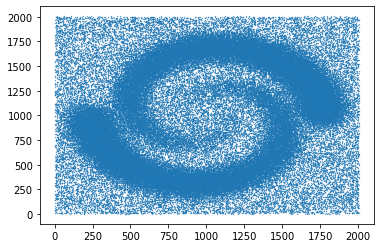

In [34]:
plt.scatter(spi_dens_cors_arr[:,0], spi_dens_cors_arr[:,1], s=0.1)

0 2.185306506109554 1
0 1.092653253054777 1
0 0.5463266265273885 71
0.27316331326369425 0.5463266265273885 6


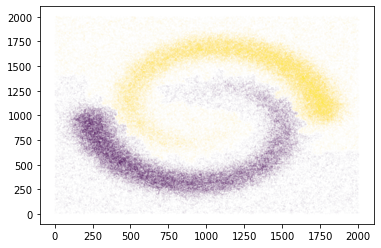

In [47]:
#X, y = datasets.make_moons(n_samples=1000, noise=0.05, random_state=1337)
clusters, _ = tomato(spi_dens_cors_arr, k=7, n_clusters=2)

plt.scatter(*spi_dens_cors_arr.T, c=clusters)
plt.show()